## Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
from math import log
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm
from sympy import symbols, diff
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Example 1: Simple cost function

### $f(x)=x^2 + x + 1$

In [2]:
def f(x):
    return x**2 + x+1

In [13]:
#Make Data using numpy
x_1 = np.linspace(start=-3,stop=3,num=100)
type(x_1)

numpy.ndarray

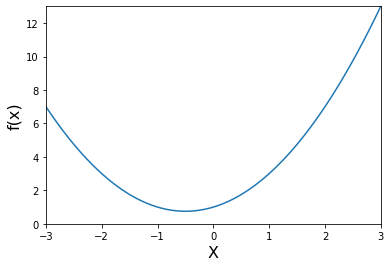

In [14]:
plt.plot(x_1,f(x_1))
plt.xlim(-3,3)
plt.ylim(0,13)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.show()

## Slopes and Derivatives

In [5]:
def df(x):
    return 2*x+1

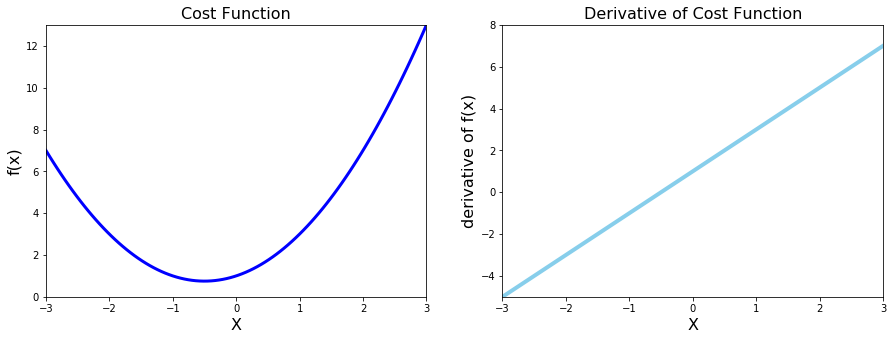

In [6]:
#Plotting function and derivative

plt.figure(figsize=(15,5))

#function plot

plt.subplot(1,2,1)
plt.plot(x_1,f(x_1),color='blue',lw=3)
plt.title('Cost Function',fontsize=16)
plt.xlim(-3,3)
plt.ylim(0,13)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

#derivative plot

plt.subplot(1,2,2)
plt.title('Derivative of Cost Function',fontsize=16)
plt.plot(x_1,df(x_1),color='skyblue',lw=4)
plt.xlabel('X',fontsize=16)
plt.ylabel('derivative of f(x)',fontsize=16)
plt.xlim(-3,3)
plt.ylim(-5,8)
plt.show()

## Python Loops and Gradient Descent

In [7]:
#I know loops
#Gradient Descent through Loops
new_x=3
step_multiplier=0.1
precision=0.0001

x_list=[new_x]
slope_list=[df(new_x)]

for n in range(500):
    prev_x   = new_x
    gradient = df(prev_x)
    new_x    = new_x-gradient*step_multiplier
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if abs(prev_x-new_x) < precision:
        break
print('The approx point of minima is : ',new_x)
print('The slope at this point is : ',df(new_x))

The approx point of minima is :  -0.49962781616118024
The slope at this point is :  0.0007443676776395236


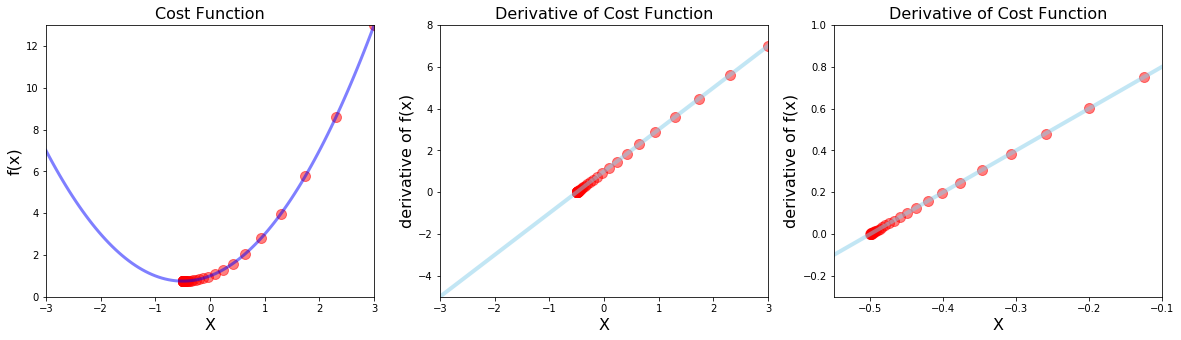

In [8]:
#Plotting function and derivative

plt.figure(figsize=(20,5))

#function plot

plt.subplot(1,3,1)
values=np.array(x_list)
plt.scatter(x_list,f(values),c='r',s=100,alpha=0.5)
plt.plot(x_1,f(x_1),color='blue',lw=3,alpha=0.5)
plt.title('Cost Function',fontsize=16)
plt.xlim(-3,3)
plt.ylim(0,13)
plt.xlabel('X',fontsize=16)
plt.ylabel('f(x)',fontsize=16)

#derivative plot

plt.subplot(1,3,2)
plt.title('Derivative of Cost Function',fontsize=16)
plt.scatter(x_list,slope_list,c='r',s=100,alpha=0.5)
plt.plot(x_1,df(x_1),color='skyblue',lw=4,alpha=0.5)
plt.xlabel('X',fontsize=16)
plt.ylabel('derivative of f(x)',fontsize=16)
plt.xlim(-3,3)
plt.ylim(-5,8)

#derivative plot close up

plt.subplot(1,3,3)
plt.title('Derivative of Cost Function',fontsize=16)
plt.scatter(x_list,slope_list,c='r',s=100,alpha=0.5)
plt.plot(x_1,df(x_1),color='skyblue',lw=4,alpha=0.5)
plt.xlabel('X',fontsize=16)
plt.ylabel('derivative of f(x)',fontsize=16)
plt.xlim(-0.55,-0.1)
plt.ylim(-0.3,1)
plt.show()

## Example 2: Multiple Minimas vs Initial guess and Advanced Functions

### $$ g(x) = x^4 -4x^2 + 5  $$

In [9]:
def g(x):
    return x**4 -4*(x**2) + 5
def dg(x):
    return 4*(x**3) - 8*(x)
x_2=np.linspace(-2,2,1000)

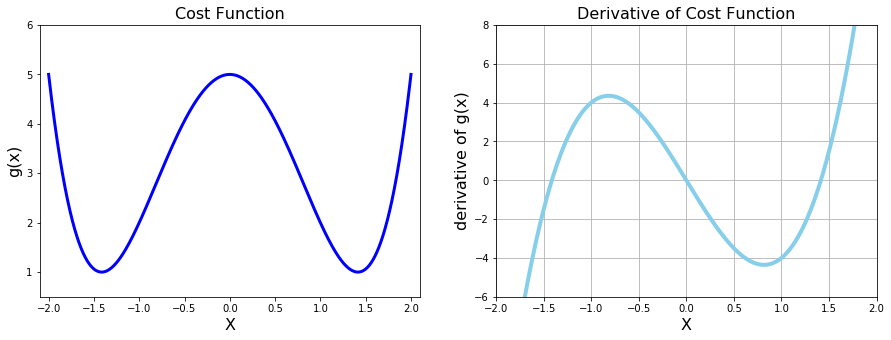

In [10]:
#Plotting function and derivative

plt.figure(figsize=(15,5))

#function plot

plt.subplot(1,2,1)
plt.plot(x_2,g(x_2),color='blue',lw=3)
plt.title('Cost Function',fontsize=16)
plt.xlim(-2.1,2.1)
plt.ylim(0.5,6)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

#derivative plot

plt.subplot(1,2,2)
plt.title('Derivative of Cost Function',fontsize=16)
plt.plot(x_2,dg(x_2),color='skyblue',lw=4)
plt.grid()
plt.xlabel('X',fontsize=16)
plt.ylabel('derivative of g(x)',fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.show()

## Gradient Descent as a Python Function

In [11]:
def gradientDescent(derivativeFunc,initial_guess,step_multiplier=0.01,precision=0.001,max_iter=500):
    new_x=initial_guess
    
    x_list=[new_x]
    slope_list=[derivativeFunc(new_x)]

    for n in range(max_iter):
        prev_x=new_x
        gradient=derivativeFunc(prev_x)
        new_x=prev_x-gradient*step_multiplier

        x_list.append(new_x)
        slope_list.append(derivativeFunc(new_x))

        if abs(prev_x-new_x) < precision:
            break
    return new_x,x_list,slope_list

Local min occurs at :  1.4140176512739588
Number of steps :  29


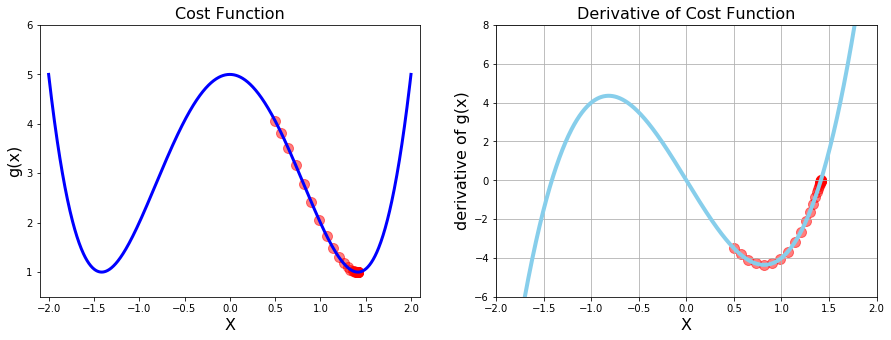

In [12]:
#Plotting function and derivative
local_min,list_x,deriv_list=gradientDescent(derivativeFunc=dg,
                                            initial_guess=0.5,
                                            precision=0.0001,
                                            step_multiplier=0.02)
print('Local min occurs at : ',local_min)
print('Number of steps : ',len(list_x))
plt.figure(figsize=(15,5))

#function plot

plt.subplot(1,2,1)
plt.plot(x_2,g(x_2),color='blue',lw=3)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.5)
plt.title('Cost Function',fontsize=16)
plt.xlim(-2.1,2.1)
plt.ylim(0.5,6)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

#derivative plot

plt.subplot(1,2,2)
plt.title('Derivative of Cost Function',fontsize=16)
plt.plot(x_2,dg(x_2),color='skyblue',lw=4)
plt.scatter(list_x,np.array(deriv_list),color='red',s=100,alpha=0.5)
plt.grid()
plt.xlabel('X',fontsize=16)
plt.ylabel('derivative of g(x)',fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.show()

## Divergence, Overflow and Python Tuples

### $$ h(x) = x^5 - 2x^4 + 2$$

In [13]:
x_3=np.linspace(-2.5,2.5,1000)
def h(x):
    return x**5 - 2*(x**4) + 2
def dh(x):
    return 5*(x**4) - 8*(x**3)


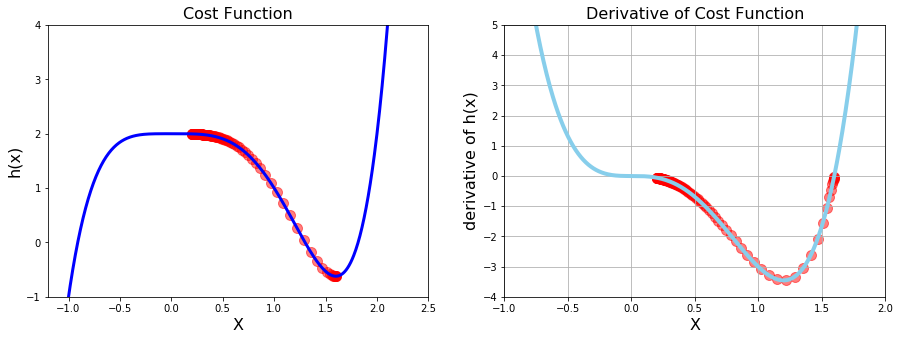

Local minimum occurs at:  1.5989534547394717
117


In [14]:
#Plotting function and derivative
local_min,list_x,deriv_list=gradientDescent(derivativeFunc=dh,
                                            initial_guess=0.2,step_multiplier=0.02)

plt.figure(figsize=(15,5))

#function plot

plt.subplot(1,2,1)
plt.plot(x_3,h(x_3),color='blue',lw=3)
plt.scatter(list_x,h(np.array(list_x)),color='red',s=100,alpha=0.5)
plt.title('Cost Function',fontsize=16)
plt.xlim(-1.2,2.5)
plt.ylim(-1,4)
plt.xlabel('X',fontsize=16)
plt.ylabel('h(x)',fontsize=16)

#derivative plot

plt.subplot(1,2,2)
plt.title('Derivative of Cost Function',fontsize=16)
plt.plot(x_3,dh(x_3),color='skyblue',lw=4)
plt.scatter(list_x,np.array(deriv_list),color='red',s=100,alpha=0.5)
plt.grid()
plt.xlabel('X',fontsize=16)
plt.ylabel('derivative of h(x)',fontsize=16)
plt.xlim(-1,2)
plt.ylim(-4,5)
plt.show()
print('Local minimum occurs at: ',local_min)
print(len(list_x))

In [15]:
import sys
#help()
#sys.version
sys.float_info.max

1.7976931348623157e+308

## Python Tuples

In [16]:
breakfast='bread','eggs','milk'
lucky_numbers=4,9,16,25,81
type(lucky_numbers)

tuple

In [17]:
single_val_tuple=4,
type(single_val_tuple)

tuple

## The Learning Rate

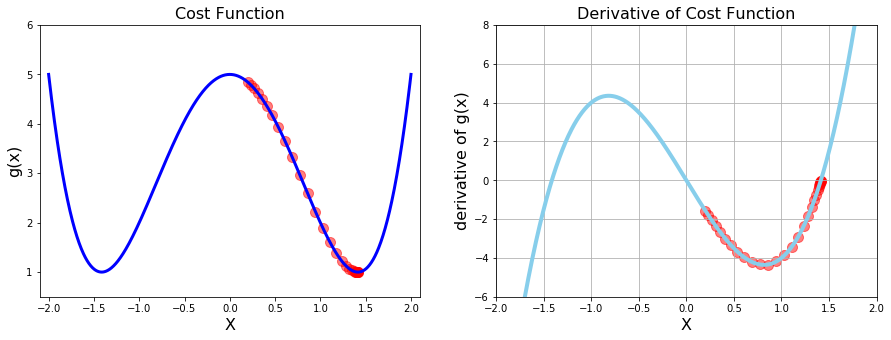

In [18]:
#Plotting function and derivative
local_min,list_x,deriv_list=gradientDescent(derivativeFunc=dg,
                                            initial_guess=0.2,step_multiplier=0.02)
plt.figure(figsize=(15,5))

#function plot

plt.subplot(1,2,1)
plt.plot(x_2,g(x_2),color='blue',lw=3)
plt.scatter(list_x,g(np.array(list_x)),color='red',s=100,alpha=0.5)
plt.title('Cost Function',fontsize=16)
plt.xlim(-2.1,2.1)
plt.ylim(0.5,6)
plt.xlabel('X',fontsize=16)
plt.ylabel('g(x)',fontsize=16)

#derivative plot

plt.subplot(1,2,2)
plt.title('Derivative of Cost Function',fontsize=16)
plt.plot(x_2,dg(x_2),color='skyblue',lw=4)
plt.scatter(list_x,np.array(deriv_list),color='red',s=100,alpha=0.5)
plt.grid()
plt.xlabel('X',fontsize=16)
plt.ylabel('derivative of g(x)',fontsize=16)
plt.xlim(-2,2)
plt.ylim(-6,8)
plt.show()

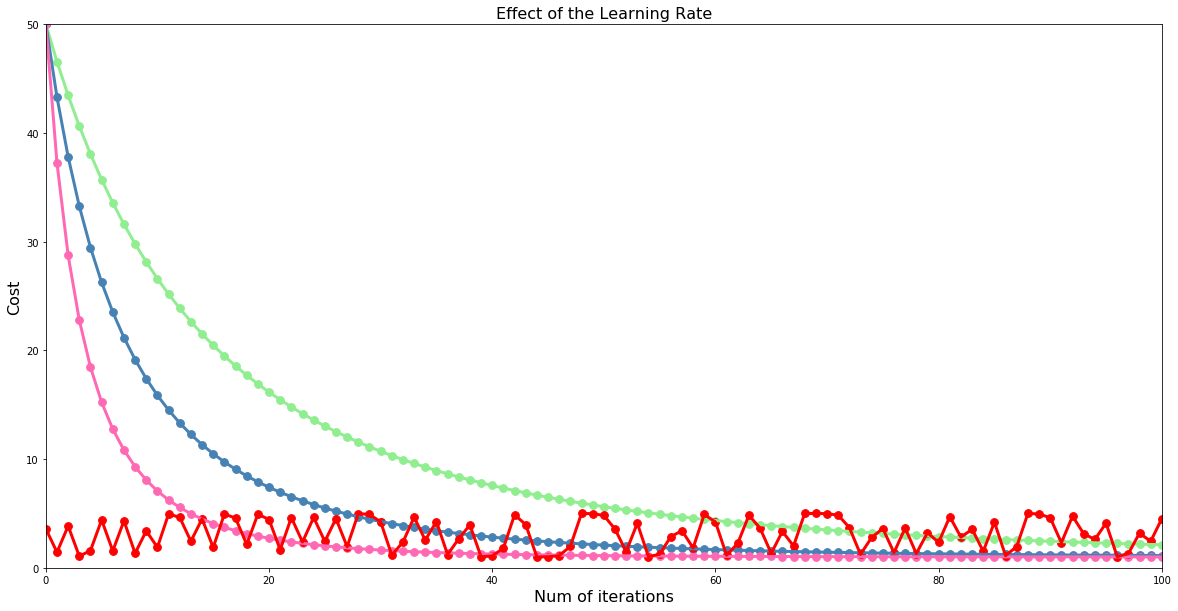

In [19]:
#Running Gradient Descent 3 times separately, analysing learning rate
n=100
low_gamma=gradientDescent(derivativeFunc=dg,initial_guess=3,step_multiplier=0.0005,max_iter=n,precision=0.0001)
mid_gamma=gradientDescent(derivativeFunc=dg,initial_guess=3,step_multiplier=0.001,max_iter=n,precision=0.0001)
high_gamma=gradientDescent(derivativeFunc=dg,initial_guess=3,step_multiplier=0.002,max_iter=n,precision=0.0001)

#experiment
insane_gamma=gradientDescent(derivativeFunc=dg,initial_guess=1.9,step_multiplier=0.25,max_iter=n,precision=0.0001)

plt.figure(figsize=(20,10))

#getting Y values:
low_values=np.array(low_gamma[1])
mid_values=np.array(mid_gamma[1])
high_values=np.array(high_gamma[1])

#getting X values

iteration_list=list(range(0,n+1))


plt.title('Effect of the Learning Rate',fontsize=16)
plt.xlim(0,n)
plt.ylim(0,50)
plt.xlabel('Num of iterations',fontsize=16)
plt.ylabel('Cost',fontsize=16)

#function plot 1 for low learning rate

plt.plot(iteration_list,g(low_values),color='lightgreen',lw=3)
plt.scatter(iteration_list,g(low_values),color='lightgreen',s=60)

#function plot 2 for medium learning rate

plt.plot(iteration_list,g(mid_values),color='steelblue',lw=3)
plt.scatter(iteration_list,g(mid_values),color='steelblue',s=60)


#function plot 3 for relatively high learning rate

plt.plot(iteration_list,g(high_values),color='hotpink',lw=3)
plt.scatter(iteration_list,g(high_values),color='hotpink',s=60)


#function plot 4 for INSANE learning rate(too large a learning rate does not lead to any convergence in the graph)

plt.plot(iteration_list,g(np.array(insane_gamma[1])),color='red',lw=3)
plt.scatter(iteration_list,g(np.array(insane_gamma[1])),color='red',s=60)


plt.show()

## Example 4: Data Viz with 3D Charts

### Minimise $$ f(x,y) = \frac{1}{r + 1} $$ where $r$ is $3^{-x^2 - y^2 }$

In [20]:
def f(x,y):
    r=3**(-x**2-y**2)
    return 1 / (r+1)


In [21]:
x_4=np.linspace(-2,2,200)
y_4=np.linspace(-2,2,200)
x_4,y_4=np.meshgrid(x_4,y_4)


print('Shape of array x_4: ',y_4.shape)
print(type(x_4))

Shape of array x_4:  (200, 200)
<class 'numpy.ndarray'>


<class 'matplotlib.figure.Figure'>


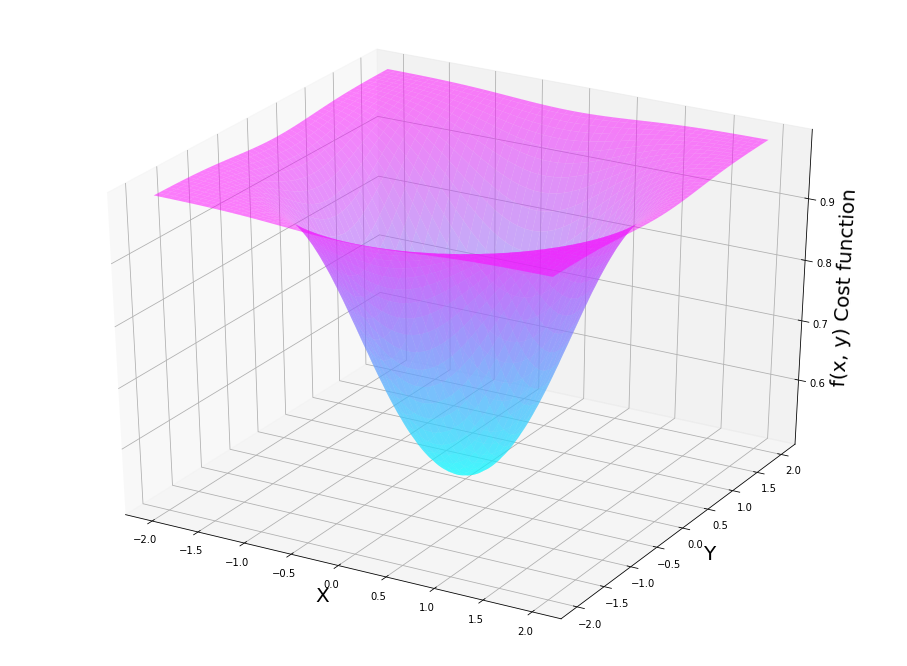

In [22]:
#Generating New 3D Plot
fig=plt.figure(figsize=(16,12))
ax=fig.gca(projection='3d')
print(type(fig))


ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x, y) Cost function',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.cool, alpha=0.5)

plt.show()

## Partial Derivatives and Symbolic Computation

### $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2-y^2}}{(3^{-x^2-y^2} + 1)^{2}}$$

### $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2-y^2}}{(3^{-x^2-y^2} + 1)^{2}}$$

In [23]:
a, b=symbols('x, y')
print('Our cost function f(x, y) is: ',f(a, b))
print('Partial Derivative wrt x: ',diff(f(a,b),a))
print('Value of cost at x=1.8 y=1.0 : ',f(a, b).evalf(subs={a:1.8,b:1}))
print('Value of partial deriv. wrt x of cost at x=1.8 y=1.0 :',diff(f(a,b),a).evalf(subs={a:1.8,b:1}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial Derivative wrt x:  2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of cost at x=1.8 y=1.0 :  0.990604794032582
Value of partial deriv. wrt x of cost at x=1.8 y=1.0 : 0.0368089716197505


## Batch Gradient Descent with Sympy

In [24]:
#setup
multiplier =0.1
max_iter=500
params=np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    grad_x = diff(f(a, b),a).evalf(subs={a:params[0], b:params[1]})
    grad_y = diff(f(a, b),b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([grad_x,grad_y])
    params = params - multiplier * gradients
    
# Results 
print('Values in gradient array : ',gradients)
print('Minimum occurs at x = ',params[0])
print('And at y = ',params[1])
print('The cost at the minima is : ', f(params[0],params[1]))

Values in gradient array :  [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x =  3.45838599885832e-11
And at y =  1.92132555492129e-11
The cost at the minima is :  0.500000000000000


### Batch Gradient Without Sympy

In [25]:
def fpx(x,y):
    r=3**(-x**2 -y**2)
    return 2*x*log(3)*r/(r+1)**2
def fpy(x,y):
    r=3**(-x**2 -y**2)
    return 2*y*log(3)*r/(r+1)**2
    

In [26]:
#setup
multiplier =0.1
max_iter=500
params=np.array([1.8, 1.0]) # initial guess


for n in range(max_iter):
    grad_x = fpx(params[0],params[1])
    grad_y = fpy(params[0],params[1])
    gradients = np.array([grad_x,grad_y])
    params = params - multiplier * gradients
    
# Results 
print('Values in gradient array : ',gradients)
print('Minimum occurs at x = ',params[0])
print('And at y = ',params[1])
print('The cost at the minima is : ', f(params[0],params[1]))

Values in gradient array :  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x =  3.458385998858304e-11
And at y =  1.9213255549212797e-11
The cost at the minima is :  0.5


## Graphing 3D Gradient Descent and Advanced Numpy Arrays

In [40]:
#setup
multiplier =0.1
max_iter=500
params=np.array([1.8, 1.0]) # initial guess
values_array=params.reshape(1,2)
print(values_array.shape)

for n in range(max_iter):
    grad_x = fpx(params[0],params[1])
    grad_y = fpy(params[0],params[1])
    gradients = np.array([grad_x,grad_y])
    params = params - multiplier * gradients
    #values_array=np.append(arr=values_array,values=params.reshape(1,2),axis=0)
    values_array=np.concatenate((values_array,params.reshape(1,2)),axis=0)
   
    
# Results 
print('Values in gradient array : ',gradients)
print('Minimum occurs at x = ',params[0])
print('And at y = ',params[1])
print('The cost at the minima is : ', f(params[0],params[1]))

(1, 2)
Values in gradient array :  [2.01013038e-11 1.11673910e-11]
Minimum occurs at x =  3.458385998858304e-11
And at y =  1.9213255549212797e-11
The cost at the minima is :  0.5


### Advanced Numpy Array Practice

In [37]:
#Basically, a two dimensional array is an array of arrays

kirk=np.array([['Captain','Guitar']])
print(kirk.shape)

hs_band=np.array([['Black Thought','MC'],['Quest Love','Drums']])
print(hs_band.shape)
print(hs_band)

the_root=np.append(arr=hs_band,values=kirk,axis=0)
print(the_root)

print('Printing Nicknames',the_root[:,1])

the_root=np.append(arr=the_root,values=[['LinkinPark','Chester']],axis=0)

(1, 2)
(2, 2)
[['Black Thought' 'MC']
 ['Quest Love' 'Drums']]
[['Black Thought' 'MC']
 ['Quest Love' 'Drums']
 ['Captain' 'Guitar']]
Printing Nicknames ['MC' 'Drums' 'Guitar']


<class 'matplotlib.figure.Figure'>


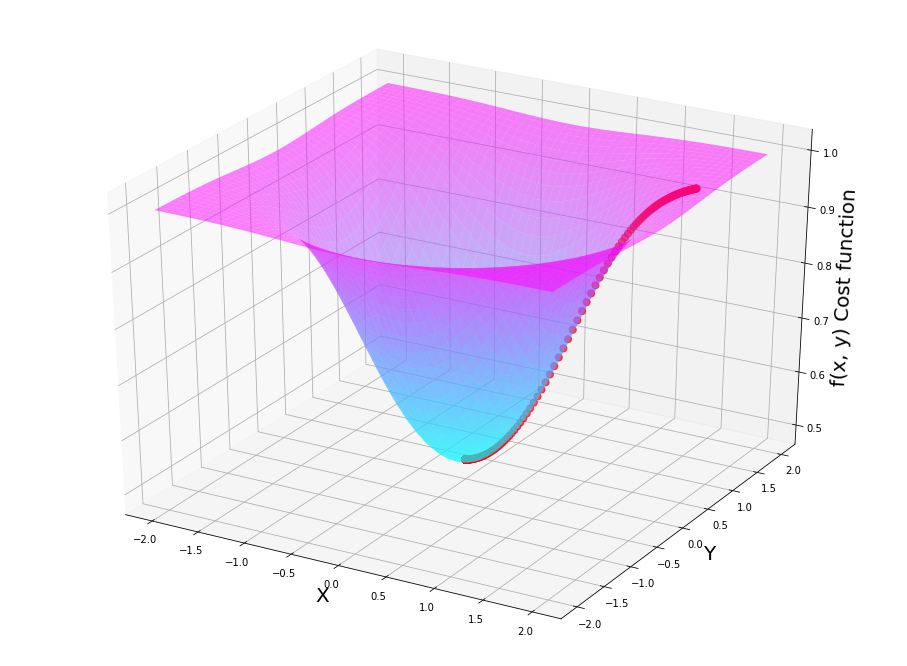

In [29]:
#Generating New Plot
fig=plt.figure(figsize=(16,12))
ax=fig.gca(projection='3d')
print(type(fig))


ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x, y) Cost function',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.cool, alpha=0.5)
ax.scatter(values_array[:,0],values_array[:,1],
           f(values_array[:,0],values_array[:,1]),s=50,alpha=0.7,c='r')
plt.show()

## Example 5: Working with Data and Real Cost Functions

### Mean Squared Error: A cost function for Regression Problems

#### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta (x^{(i)}) \big)^2  $$

#### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta (x^{(i)}) \big)^2  $$

In [30]:
#Making Sample Data

x_5=np.array([[0.1,1.2,2.4,3.2,4.1,5.7,6.5]]).transpose()
y_5=np.array([[1.7,2.4,3.5,3.0,6.1,9.4,8.2]]).transpose()

print('Shape of x5: ',x_5.shape)

Shape of x5:  (7, 1)


In [51]:
#Running Quick Linear Regression
regr=LinearRegression()
regr.fit(x_5,y_5)
print(regr.score(x_5,y_5))
print('theta_0:',regr.intercept_[0])
print('theta_1:',regr.coef_[0][0])

0.8785549225502157
theta_0: 0.8475351486029536
theta_1: 1.2227264637835915


Text(0, 0.5, 'y values')

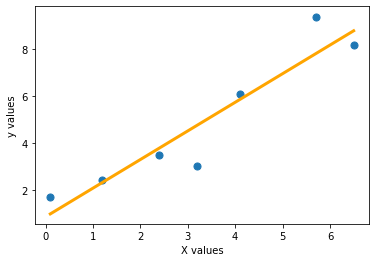

In [46]:
plt.scatter(x_5,y_5,s=50)
plt.plot(x_5,regr.predict(x_5),c='orange',lw=3)
plt.xlabel('X values')
plt.ylabel('y values')

In [47]:
#y_pred are predicted y values
y_pred=0.8475351486029536+1.2227264637835915*x_5
print(y_pred)

[[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]


In [48]:
#y_hat stands for the predicted values of y using linear regression
def MSE(y,y_hat):    
    n=len(y)
    return (1/n)*sum((y-y_hat)**2)


In [52]:
#printing the mean squared error in multiple ways
print(MSE(y_5,y_pred))

print(mean_squared_error(y_5,regr.predict(x_5)))


[0.94796558]
0.9479655759794577
